In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SingleLayerNeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layer = nn.Linear(self.input_dim, self.output_dim, bias=False)
    
    def forward(self, data):
        out = self.layer(data)
        return out

In [3]:
data = pd.read_csv('data-m111111-ignore-stats.csv', dtype=str)
data

,Do you want to be in society?,Do you make an attempt to socialise?,Do you consume things to alter your perspective? (Alcohol and stuff),Are you depressed?,Do you try to improve yourself?,Would you compromise with a friend?,If you and another person were both thirsty and you only had enough water for one person; would you share with the other person?,If a colleague invited you to do something with them; how would you answer? (Date; hang-out; party; etc.),Are you anxious of social interaction?,Do you think you fit in with other people?,...,Do you talk to people on a regular basis? (Internet stuff doesn't count),Do you have unconventional interests? (Anime; collecting specific items; weird fetishes; etc.),Are you currently in education; training or employment?,Are you good at speaking?,Is your family proud of you?,Do people usually like being around you?,Can you transport yourself easily?,Are you physically in-shape?,X,Y
0,Y,Y,Y,0,0,A,N,Y,0,A,...,N,Y,Y,N,0,N,0,N,-3.0,2.25
1,D,A,0,A,A,D,Y,Y,0,0,...,Y,N,Y,0,Y,A,Y,Y,-1.0,4.0
2,D,0,Y,N,Y,Y,Y,Y,N,N,...,N,Y,Y,Y,N,0,0,N,-2.0,0.75
3,A,A,D,D,Y,N,N,N,A,N,...,Y,Y,N,N,D,A,0,Y,-0.5,1.5
4,0,Y,Y,D,Y,0,Y,N,0,Y,...,N,N,N,A,0,Y,0,D,-3.5,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,A,A,0,Y,N,Y,Y,Y,0,...,N,N,N,0,A,A,N,0,-0.5,3.5
196,Y,N,A,N,0,0,Y,Y,D,N,...,Y,N,N,A,N,D,N,A,-2.5,0.75
197,A,D,Y,N,D,N,N,N,0,0,...,N,N,Y,A,0,A,D,0,0.5,-3.25
198,Y,A,Y,D,Y,N,Y,N,Y,A,...,Y,N,N,N,D,D,N,D,0.5,3.0


In [4]:
XY = data.values[:,-2:].astype(float)
XY

array([[-3.  ,  2.25],
       [-1.  ,  4.  ],
       [-2.  ,  0.75],
       [-0.5 ,  1.5 ],
       [-3.5 , -2.  ],
       [-5.5 , -2.  ],
       [-7.  ,  2.25],
       [-3.5 , -2.  ],
       [-3.  ,  3.25],
       [ 0.5 ,  6.  ],
       [-2.  , -3.  ],
       [-5.  ,  0.75],
       [-6.  ,  3.5 ],
       [-2.  , -4.5 ],
       [-2.  ,  2.25],
       [-2.  ,  2.25],
       [-2.5 , -3.25],
       [ 3.  ,  0.75],
       [-6.  , -4.25],
       [-5.  ,  3.  ],
       [ 2.5 ,  2.25],
       [-3.  ,  0.5 ],
       [ 4.5 ,  2.5 ],
       [-1.  , -1.5 ],
       [-7.  , -2.25],
       [-2.  , -2.  ],
       [-2.  , -2.75],
       [-2.  ,  2.25],
       [-2.  , -1.5 ],
       [-4.  ,  0.  ],
       [ 0.  , -0.25],
       [-6.  ,  0.  ],
       [-1.  , -2.75],
       [ 3.  , -0.5 ],
       [-4.5 ,  0.5 ],
       [-4.  ,  4.25],
       [-2.  ,  0.75],
       [-3.  , -0.25],
       [ 1.  ,  2.5 ],
       [ 0.  , -4.5 ],
       [ 0.5 ,  5.25],
       [ 3.  ,  0.5 ],
       [-2.  , -3.25],
       [-5.

In [5]:
# one-hot encode the categorical data
answers = pd.get_dummies(data[data.columns[:-2]])
answers

,Do you want to be in society?_0,Do you want to be in society?_A,Do you want to be in society?_D,Do you want to be in society?_N,Do you want to be in society?_Y,Do you make an attempt to socialise?_0,Do you make an attempt to socialise?_A,Do you make an attempt to socialise?_D,Do you make an attempt to socialise?_N,Do you make an attempt to socialise?_Y,...,Can you transport yourself easily?_0,Can you transport yourself easily?_A,Can you transport yourself easily?_D,Can you transport yourself easily?_N,Can you transport yourself easily?_Y,Are you physically in-shape?_0,Are you physically in-shape?_A,Are you physically in-shape?_D,Are you physically in-shape?_N,Are you physically in-shape?_Y
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
196,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
197,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
198,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


x mean: -2.0, y mean: 0.0


/home/nathanielbd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


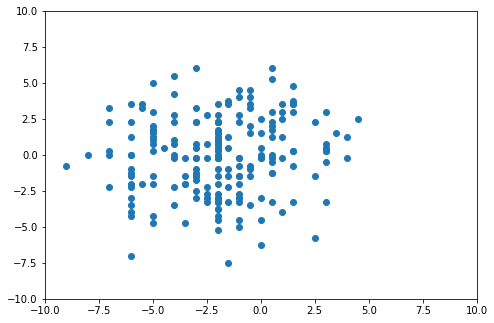

In [6]:
# plot all the results
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.scatter(XY[:,0], XY[:,1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
print(f'x mean: {round(XY[:,0].mean()*2)/2}, y mean: {round(XY[:,1].mean()*4)/4}')
fig.show()

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(answers, XY)
vals = pd.DataFrame([[round(val*2)/2 for val in reg.coef_[0]], 
    [round(val*4)/4 for val in reg.coef_[1]]], columns=pd.get_dummies(data[data.columns[:-2]]).columns)
vals.index = ['X', 'Y']
vals.to_csv('weights.csv')

In [8]:
answers = answers.values
answers = answers.astype(int)
XY = XY.astype(float)
# reserve 20 trials as testing data
CUTOFF = answers.shape[0]-20
train_ans, train_res = answers[:CUTOFF], XY[:CUTOFF]
test_ans, test_res = answers[CUTOFF:], XY[CUTOFF:]
# load the data as answers-results tuples
train_dataset = list(zip(torch.from_numpy(train_ans), torch.from_numpy(train_res)))
test_dataset = list(zip(torch.from_numpy(test_ans), torch.from_numpy(test_res)))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1)

In [12]:
model = SingleLayerNeuralNetwork(answers.shape[1], XY.shape[1])
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.1)
criterion = nn.L1Loss()
losses = []
EPOCHS = 10000
for epoch in range(EPOCHS):
    loss = 0
    for ans, res in train_loader:
        ans, res = ans.float(), res.float()
        optimizer.zero_grad()
        pred_res = model(ans)
        train_loss = criterion(pred_res, res)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    losses.append(loss)
    if (epoch+1)%100==0:
        print(f'epoch: {epoch+1}/{EPOCHS}, loss: {loss}')
    if loss <= 0.5:
        break

epoch: 100/10000, loss: 338.1403345167637
epoch: 200/10000, loss: 300.71368999034166
epoch: 300/10000, loss: 269.3700200468302
epoch: 400/10000, loss: 240.37585005164146
epoch: 500/10000, loss: 217.63825142383575
epoch: 600/10000, loss: 198.72773905098438
epoch: 700/10000, loss: 182.36454766988754
epoch: 800/10000, loss: 169.8090111464262
epoch: 900/10000, loss: 159.14261628687382
epoch: 1000/10000, loss: 150.3386864811182
epoch: 1100/10000, loss: 142.63632433116436
epoch: 1200/10000, loss: 135.57253767549992
epoch: 1300/10000, loss: 129.18267264962196
epoch: 1400/10000, loss: 123.29543614387512
epoch: 1500/10000, loss: 118.17889312654734
epoch: 1600/10000, loss: 113.52769738435745
epoch: 1700/10000, loss: 109.42871092259884
epoch: 1800/10000, loss: 105.84184664487839
epoch: 1900/10000, loss: 102.57962767779827
epoch: 2000/10000, loss: 99.50152845680714
epoch: 2100/10000, loss: 96.6053575873375
epoch: 2200/10000, loss: 93.9669192135334
epoch: 2300/10000, loss: 91.55954059958458
epoch: 

KeyboardInterrupt: 

In [ ]:
params = list(model.parameters())
params

In [ ]:
x_weights = params[0][0].detach()
columns = pd.get_dummies(data[data.columns[:-2]]).columns
x_weights = pd.DataFrame(np.array([x_weights.numpy()]), columns=columns)
# observe from the .csv files that X is always in increments of 0.5
x_weights = x_weights.applymap(lambda val: round(val*2)/2)
x_weights

In [ ]:
y_weights = params[0][1].detach()
y_weights = pd.DataFrame(np.array([y_weights.numpy()]), columns=columns)
# observe from the .csv files that Y is always in increments of 0.25
y_weights = y_weights.applymap(lambda val: round(val*4)/4)
y_weights

In [ ]:
all_weights = pd.concat([x_weights, y_weights], ignore_index=True)
all_weights.index = ['X','Y']
# all_weights.to_csv('weights.csv')
all_weights

In [ ]:
all_weights = pd.read_csv('weights.csv', index_col=0)
x_weights = all_weights.loc['X']
y_weights = all_weights.loc['Y']
# see the diffs after rounding the weights
x_tensor = torch.from_numpy(x_weights.values).float()
y_tensor = torch.from_numpy(y_weights.values).float()
for ans, res in train_loader:
    ans, res = ans.float(), res.float()
    pred_res = torch.from_numpy(np.array([[(ans@x_tensor.T).item(),(ans@y_tensor.T).item()]]))
    diff = res.detach().numpy().flatten()-pred_res.detach().numpy().flatten()
    print(f'diff: {diff}')
for ans, res in test_loader:
    ans, res = ans.float(), res.float()
    pred_res = torch.from_numpy(np.array([[(ans@x_tensor.T).item(),(ans@y_tensor.T).item()]]))
    diff = res.detach().numpy().flatten()-pred_res.detach().numpy().flatten()
    print(f'diff: {diff}')